In [1]:
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/')
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/data')
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/rl2')
import torch
from model import RL2, MetaLearner
from evaluate import evaluate_1d, evaluate_metalearner
import torch.nn.utils.rnn as rnn_utils
import numpy as np
FONTSIZE=20

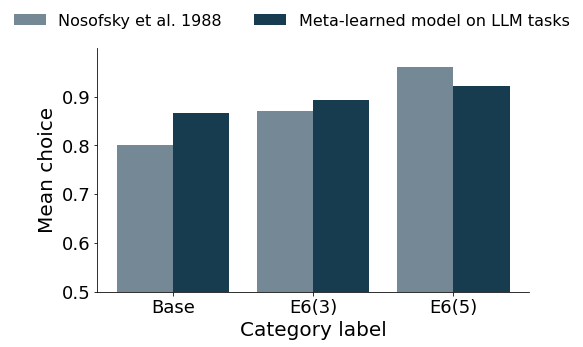

In [2]:
from plots import metalearner_nosofskys_task
metalearner_nosofskys_task(experiment=2, noises=[0.0], shuffles=[True], num_runs=50, num_blocks=1, num_eval_tasks=64)

In [ ]:
from plots import compare_metalearners
compare_metalearners(tasks=np.arange(1,7), noises=[0.0], shuffles=[True], shuffle_evals=[False], experiment='shepard_categorisation', num_runs=50, num_eval_tasks=64)

In [ ]:
from plots import metalearner_leverings_task
metalearner_leverings_task(noises=[0.0], shuffles=[True], num_runs=50, num_eval_tasks=64, num_trials=150)

# Test meta-learner for different categorisation effects

### Levering et al. 2019: linear vs non-linear decision boundary

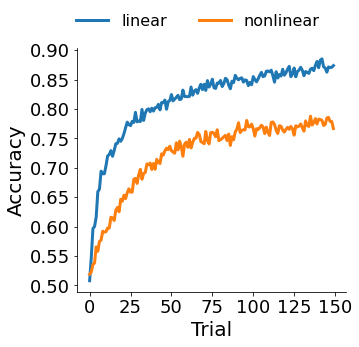

In [4]:
from plots import metalearner_leverings_task
metalearner_leverings_task(shuffles=[True], num_runs=20, num_eval_tasks=64, num_trials=150)

#### conditions

In [4]:
from envs import LeveringsTask
levs_task = LeveringsTask(task='nonlinear')#, batch_size=1, num_blocks=1)
a, b, c = levs_task.sample_batch()

In [5]:
a[0, :6, :3], c[0][:6]

(tensor([[0., 1., 1.],
         [0., 1., 0.],
         [1., 0., 1.],
         [1., 0., 1.],
         [1., 1., 0.],
         [1., 1., 0.]], dtype=torch.float64),
 tensor([[1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]], dtype=torch.float64))

### Nosofsky 1998: Base-rate effects

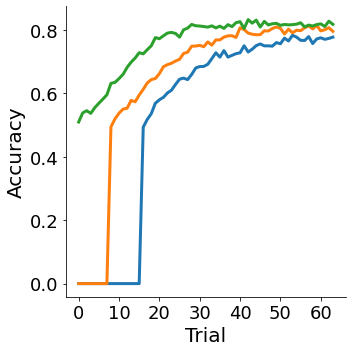

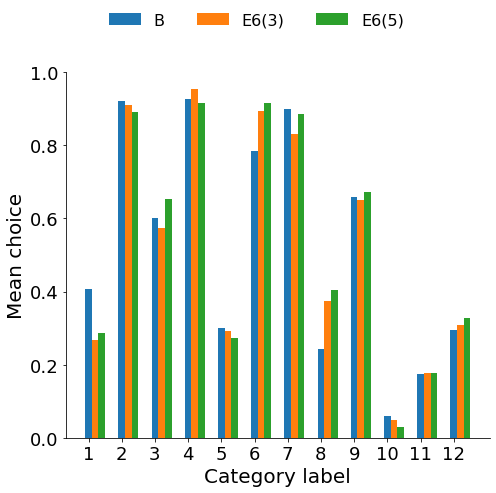

In [2]:
from plots import metalearner_nosofskys_task
metalearner_nosofskys_task(experiment=2, noises=[0.0], shuffles=[True], num_runs=50, num_blocks=1, num_eval_tasks=64)

#### conditions

In [3]:
from envs import NosofskysTask
nosofs_task = NosofskysTask(task=[4, 1, 5], batch_size=3)
a, b, c = nosofs_task.sample_batch()

[tensor([[ 1.],
        [ 0.],
        [ 7.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 8.],
        [10.],
        [ 8.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 9.],
        [ 8.],
        [11.],
        [ 6.],
        [ 1.],
        [11.],
        [ 0.],
        [ 5.],
        [ 3.],
        [ 2.],
        [ 6.],
        [ 7.],
        [ 9.],
        [ 1.],
        [11.],
        [ 2.],
        [ 0.],
        [ 9.],
        [ 4.],
        [ 1.],
        [10.],
        [11.],
        [ 1.],
        [ 2.],
        [ 4.],
        [ 4.],
        [ 7.],
        [ 7.],
        [ 1.],
        [ 1.],
        [ 3.],
        [ 1.],
        [ 0.],
        [ 1.],
        [ 3.],
        [ 6.],
        [ 1.],
        [ 5.],
        [ 3.],
        [ 2.],
        [ 8.],
        [ 1.],
        [ 1.],
        [ 1.],
        [10.],
        [10.],
        [ 6.],
        [ 1.],
        [ 5.],
        [ 9.]], dtype=torch.float64), tensor([[ 0.],
 

#### Replication of figure

In [15]:
from envs import NosofskysTask
nosofs_task = NosofskysTask(task=[4, None, None], batch_size=1)
a, b, c = nosofs_task.sample_batch()

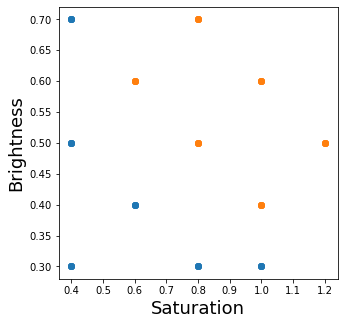

In [59]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(a[:, c[0].squeeze()==0, 1], a[:, c[0].squeeze()==0, 0])
ax.scatter(a[:, c[0].squeeze()==1, 1], a[:, c[0].squeeze()==1, 0])
ax.set_xlabel('Saturation', fontsize=FONTSIZE-2)
ax.set_ylabel('Brightness', fontsize=FONTSIZE-2)
plt.show()

### Shepard et al. 1961: Learning trends

In [1]:
from plots import compare_metalearners
compare_metalearners(tasks=np.arange(1,7), noises=[0.0], shuffles=[True], shuffle_evals=[False], experiment='shepard_categorisation', num_runs=10, num_eval_tasks=32)#shepard_categorisation

ModuleNotFoundError: No module named 'plots'

# Compare meta-learning models

In [3]:
from plots import compare_metalearners

/raven/u/ajagadish/vanilla-llama/categorisation/rl2/envs.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].apply(lambda x: 0. if x=='A' else 1.) if torch.rand(1) > 0.5 else data['target'].apply(lambda x: 1. if x=='A' else 0.)
/raven/u/ajagadish/vanilla-llama/categorisation/rl2/envs.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['input'] = data['input'].apply(lambda x: list(map(float, x.strip('[]').split(','))))


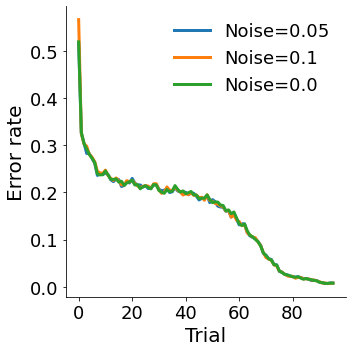

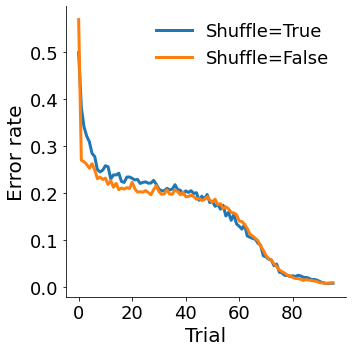

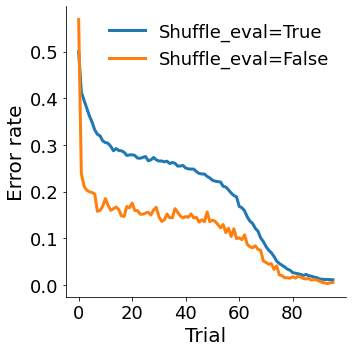

In [4]:
compare_metalearners(num_runs=5)

# Evaluate meta-learner on validation task

In [11]:
noise=0.1
shuffle=False
shuffle_eval=False

In [12]:
env_name='/raven/u/ajagadish/vanilla-llama/categorisation/data/claude_generated_tasks_paramsNA_dim3_data100_tasks14000.csv'
model_path=f"/raven/u/ajagadish/vanilla-llama/categorisation/trained_models/env=claude_generated_tasks_paramsNA_dim3_data100_tasks14000_num_episodes500000_num_hidden=128_lr0.0003_noise{noise}_shuffle{shuffle}_run=0.pt"

### model and training class distribution in eval

In [4]:
num_runs=10

In [5]:
for run_idx in range(num_runs):
    _, model_choices, true_choices, sequences = evaluate_1d(env_name=env_name, \
                      model_path=model_path, \
                      mode='val', return_all=True, shuffle_trials=shuffle_eval)
    cum_sum = np.array(sequences).cumsum()
    pooled_model_choices = np.ones((num_runs, len(cum_sum), np.diff(cum_sum).max())) if run_idx==0 else pooled_model_choices
    pooled_true_choices = np.ones((num_runs, len(cum_sum), np.diff(cum_sum).max())) if run_idx==0 else pooled_true_choices
    model_choices = model_choices.round()
    for task_idx, seq in enumerate(cum_sum[:-1]):
        task_correct = (model_choices==true_choices)[cum_sum[task_idx]:cum_sum[task_idx+1]]
        pooled_model_choices[run_idx, task_idx,:(cum_sum[task_idx+1]-cum_sum[task_idx])] = model_choices[cum_sum[task_idx]:cum_sum[task_idx+1]]
        pooled_true_choices[run_idx, task_idx,:(cum_sum[task_idx+1]-cum_sum[task_idx])] = true_choices[cum_sum[task_idx]:cum_sum[task_idx+1]]

/raven/u/ajagadish/vanilla-llama/categorisation/rl2/envs.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].apply(lambda x: 0. if x=='A' else 1.) if torch.rand(1) > 0.5 else data['target'].apply(lambda x: 1. if x=='A' else 0.)
/raven/u/ajagadish/vanilla-llama/categorisation/rl2/envs.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['input'] = data['input'].apply(lambda x: list(map(float, x.strip('[]').split(','))))


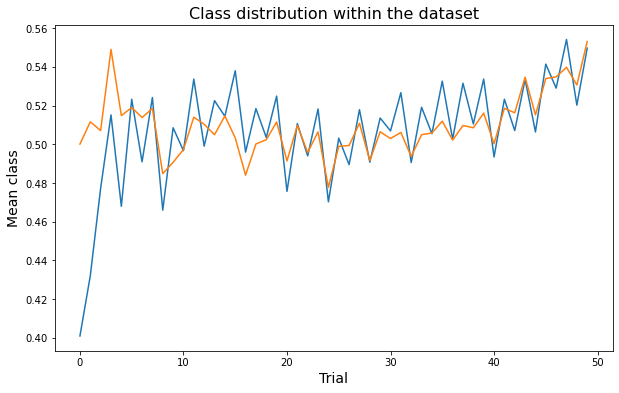

In [7]:
plt.figure(figsize=(10,6))
plt.plot(pooled_true_choices.mean(0).mean(0)[:50])
plt.plot(pooled_model_choices.mean(0).mean(0)[:50])
plt.title("Class distribution within the dataset", fontsize=16)
plt.xlabel("Trial", fontsize=14)
plt.ylabel("Mean class", fontsize=14)
plt.show()

### evaluate an example model on left-out tasks

/raven/u/ajagadish/vanilla-llama/categorisation/rl2/envs.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].apply(lambda x: 0. if x=='A' else 1.) if torch.rand(1) > 0.5 else data['target'].apply(lambda x: 1. if x=='A' else 0.)
/raven/u/ajagadish/vanilla-llama/categorisation/rl2/envs.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['input'] = data['input'].apply(lambda x: list(map(float, x.strip('[]').split(','))))


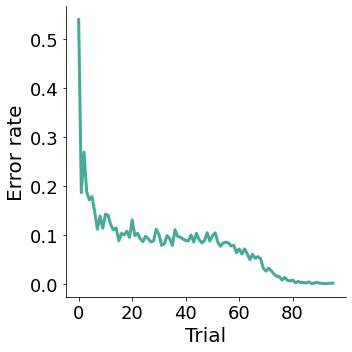

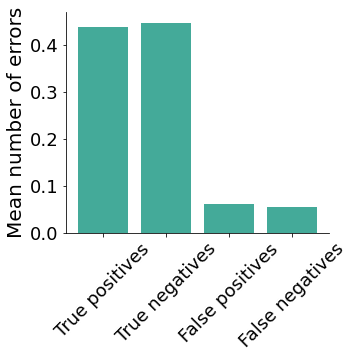

In [14]:
from plots import metalearner_evaluation
metalearner_evaluation(env_name, model_path, shuffle_trials=shuffle_eval, num_runs=10)

# Evaluate meta-learner on Badham et al. 2017 task

In [26]:
dat = pd.read_csv('../data/human/exp1.csv')
model = torch.load(model_path)[1]
dat['shifted_category'] = np.concatenate((np.array([0.]), dat['category'].values[:-1]))
participants = dat.participant.unique()
conditions = dat.condition.unique()
performance = np.zeros((len(conditions), len(participants)))
per_trial_performance = np.ones((len(conditions), len(participants), 96))
inputs = []
for idx1, cond in enumerate(conditions):
    for idx2, participant in enumerate(participants):
        CONDITION = cond #4
        PARTICIPANT = participant #0
        ## order of features matched to what llm generated order
        inputs = dat[dat.participant==PARTICIPANT][dat.condition==CONDITION][['feature3','feature1','feature2', 'shifted_category']].values #shifted_category
        targets = dat[dat.participant==PARTICIPANT][dat.condition==CONDITION]['category'].values

        inputs = [torch.from_numpy(inputs)]
        packed_inputs = rnn_utils.pad_sequence(inputs, batch_first=True)
        sequence_lengths = [len(x) for x in inputs]

        with torch.no_grad():
            model.eval()
            model_choices = model(packed_inputs, sequence_lengths)
            true_choices = targets.astype(float)
            model_choices = model_choices.view(-1).float().round()
            #print(true_choices.shape, model_choices.shape)
            per_trial_performance[idx1, idx2, :sequence_lengths[0]] = torch.eq(torch.tensor(true_choices), model_choices)
            accuracy = torch.eq(torch.tensor(true_choices), model_choices).sum()/len(model_choices)
        performance[idx1, idx2] = accuracy

/tmp/ipykernel_113657/1486030244.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inputs = dat[dat.participant==PARTICIPANT][dat.condition==CONDITION][['feature3','feature1','feature2', 'shifted_category']].values #shifted_category
/tmp/ipykernel_113657/1486030244.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  targets = dat[dat.participant==PARTICIPANT][dat.condition==CONDITION]['category'].values


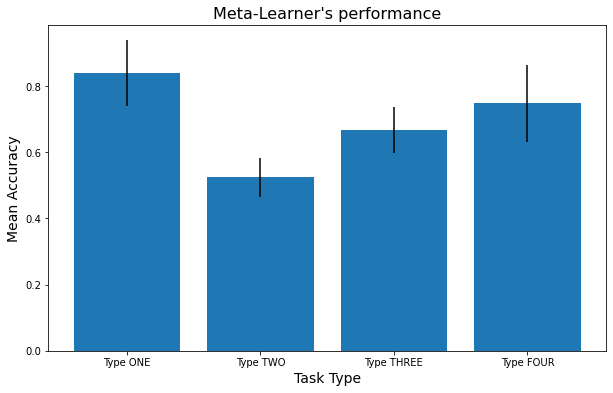

In [27]:
plt.figure(figsize=(10,6))
plt.bar(conditions,  performance.mean(1), yerr= performance.std(1), tick_label=["Type ONE", "Type TWO", "Type THREE", "Type FOUR"])
plt.title("Meta-Learner's performance", fontsize=16)
plt.xlabel("Task Type", fontsize=14)
plt.ylabel("Mean Accuracy", fontsize=14)
plt.show()

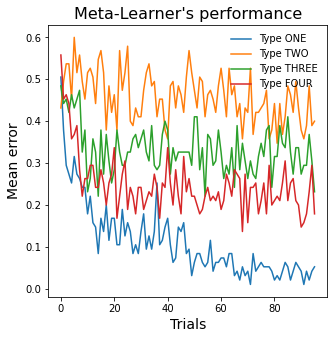

In [28]:
plt.figure(figsize=(5,5))
plt.plot(1-per_trial_performance.mean(1).T,  label=["Type ONE", "Type TWO", "Type THREE", "Type FOUR"])
plt.title("Meta-Learner's performance", fontsize=16)
plt.xlabel("Trials", fontsize=14)
plt.ylabel("Mean error", fontsize=14)
plt.legend(frameon=False)#, fontsize=14)
plt.show()